Radhika Puri - Machine Learning FALL 2025

Homework Assignment 2

6 October 2025

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

url = "https://raw.githubusercontent.com/rhamzaali/CPSC393-MachineLearning/refs/heads/main/datasets/assignment_02_mushrooms.csv"
shroomdata = pd.read_csv(url, delimiter = ";") #delimited with semicolons for some reason :(

#some cleaning
shroomdata = shroomdata.dropna(axis=1, thresh=len(shroomdata) - 15000)
shroomdata = shroomdata.dropna()

#proportions of cat columns
categorical_columns = ['class', 'cap-shape', 'cap-color', 'cap-surface', 'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print((shroomdata[col].value_counts(normalize=True) * 100).round(2).astype(str) + '%')

shroomdata['class'] = shroomdata['class'].map({'p': 0, 'e': 1}) #0 is poisonous, 1 is edible


Column: class
class
p    54.29%
e    45.71%
Name: proportion, dtype: object

Column: cap-shape
cap-shape
x    48.18%
f    22.93%
s    12.47%
b     6.45%
p     3.96%
o     3.31%
c      2.7%
Name: proportion, dtype: object

Column: cap-color
cap-color
n    41.41%
y    12.04%
w    12.03%
o     7.58%
e     7.52%
g     5.43%
p     3.72%
k     2.64%
r     2.53%
u      2.2%
l     1.49%
b      1.4%
Name: proportion, dtype: object

Column: cap-surface
cap-surface
t    18.95%
s     17.7%
d    11.51%
h    10.07%
g     9.89%
y     9.48%
e     5.24%
w     4.85%
k     4.41%
i      4.1%
l     3.81%
Name: proportion, dtype: object

Column: does-bruise-or-bleed
does-bruise-or-bleed
f    79.05%
t    20.95%
Name: proportion, dtype: object

Column: gill-attachment
gill-attachment
a    25.22%
d    19.54%
p    13.33%
e    12.38%
x    12.38%
s    12.38%
f     4.76%
Name: proportion, dtype: object

Column: gill-color
gill-color
w    28.75%
y    18.42%
n    17.54%
p    12.98%
g     5.42%
o     5.05%
f     4.7

In [33]:
#features and target, x and y
X = shroomdata.drop('class', axis=1)
y = shroomdata['class']
X = pd.get_dummies(X, drop_first=True)

#data split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
#NN Model
model = Sequential()

#input layer and hidden layers
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.3))  # Dropout for regularization

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

#compiling
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#training
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


927/927 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8084 - loss: 0.3620 - val_accuracy: 0.9964 - val_loss: 0.0108
Epoch 2/50
927/927 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9894 - loss: 0.0320 - val_accuracy: 0.9976 - val_loss: 0.0060
Epoch 3/50
927/927 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9941 - loss: 0.0174 - val_accuracy: 0.9968 - val_loss: 0.0060
Epoch 4/50
927/927 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9951 - loss: 0.0125 - val_accuracy: 0.9978 - val_loss: 0.0037
Epoch 5/50
927/927 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9969 - loss: 0.0088 - val_accuracy: 0.9970 - val_loss: 0.0048
Epoch 6/50
927/927 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9972 - loss: 0.0074 - val_accuracy: 0.9981 - val_loss: 0.0030
Epoch 7/50
927/927 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9965 - loss: 0.0091 - val_accuracy: 0.9976 - val_loss: 0.0037
Epoch 8/50
927/927 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9980 - loss: 0.0070 - val_accuracy: 0.9980 - val_

In [35]:
train_loss, train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")

Train Accuracy: 0.9987184405326843
Test Accuracy: 0.997976541519165


In [36]:
#logistic Regression training, predicting, and evaluations on the same train test data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

log_train_acc = accuracy_score(y_train, y_train_pred)
log_test_acc = accuracy_score(y_test, y_test_pred)

print(f"Logistic Regression Train Accuracy: {log_train_acc}")
print(f"Logistic Regression Test Accuracy: {log_test_acc}")


Logistic Regression Train Accuracy: 0.7882099015243491
Logistic Regression Test Accuracy: 0.79279643868879


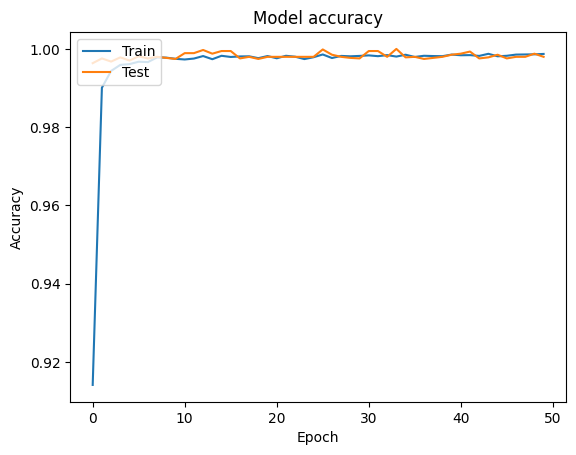

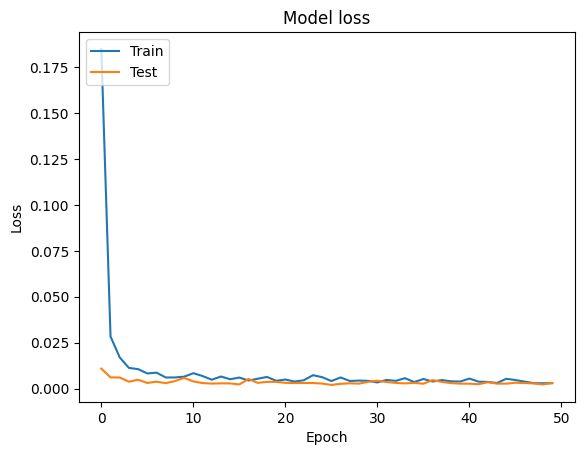

In [37]:
import matplotlib.pyplot as plt

#plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()